## Book Recommender

Progetto di Applicazioni di Data Intensive a.a. 2021/2022

**Realizzato da**: Sara Ragnetti

sara.ragnetti@studio.unibo.it

# Caricamento Librerie

Prima di iniziare, è bene importare tutte le librerie necessarie per effettuare operazioni sui dati.

*   csv: libreria per leggere e scrivere dati da forma tabulare in file CSV; 
*   pandas: libreria che fornisce strutture e strumenti per l'analisi di dati in linguaggio Python;
*   numpy: lavorare con vettori e matrici in maniera più efficiente e veloce;
* seaborn: libreria per la creazione di grafici statistici;
* pyplot:  libreria per la creazione di grafici per il linguaggio di programmazione Python e la libreria matematica NumPy.


In [ ]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
global k,metric
k=4
metric='cosine'

Prima di costruire il modello di Machine Learning per un book recommender, occorre comprendere ed analizzare i dati che saranno utilizzati nello svolgimento del progetto.

In [ ]:
books = pd.read_csv('sample_data/BX-Books.csv', sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ["ISBN", "bookTitle", "bookAuthor", "yearOfPubblication", "publisher", "imageUrlS", "imageUrlM", "imageUrlL"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

In [ ]:
books.shape

(271360, 8)

In [ ]:
users = pd.read_csv('sample_data/BX-Users.csv', sep=";", error_bad_lines=False, encoding="latin-1")
users.columns = ["userId", "Location", "Age"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
users.shape

(278858, 3)

In [ ]:
ratings = pd.read_csv('sample_data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding="latin-1")
ratings.columns = ["userId", "ISBN", "bookRating"]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ratings.shape

(1149780, 3)

# Books

Esploriamo ora ciascuno dei tre dataset importati, iniziando da quello relativo ai libri. Le colonne relative alle immagini non sono necessarie per l'analisi, quindi è opportuno rimuoverle.

In [ ]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPubblication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace=True)

In [ ]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPubblication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Sistemiamo la tabella in modo che sia visibile il testo completo di ogni sua colonna.

In [ ]:
pd.set_option('display.max_colwidth', None)

Effettuiamo dei controlli su alcuni attributi.

**yearOfPubblication**

Prima controlliamo i valori della colonna yearOfPubblication e osserviamo che è presente uno 0. 
Probabilmente si tratta di un errore del dataset, quindi andiamo a sostituire quel valore con la media degli anni di pubblicazione di tutti gli altri libri. A questo punto occorre convertire tutti valori della colonna yearOfPubblication in int32.

In [ ]:
books.yearOfPubblication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Risulta evidente che due publisher siano stati erroneamente inseriti come yearOfPublication. Dobbiamo rimuoverli.

In [ ]:
books.loc[books.yearOfPubblication == 'DK Publishing Inc', :]

,ISBN,bookTitle,bookAuthor,yearOfPubblication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [ ]:
books.loc[books.ISBN == '078946697X', 'yearOfPubblication'] = 2000
books.loc[books.ISBN == '078946697X', 'bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X', 'bookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[books.ISBN == '078946697X', 'publisher'] = 'DK Publishing Inc'

books.loc[books.ISBN == '0789466953', 'yearOfPubblication'] = 2000
books.loc[books.ISBN == '0789466953', 'bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'bookTitle'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[books.ISBN == '0789466953', 'publisher'] = 'DK Publishing Inc'

In [ ]:
books.loc[books.yearOfPubblication == 'Gallimard', :]

,ISBN,bookTitle,bookAuthor,yearOfPubblication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [ ]:
books.loc[books.ISBN == '2070426769', 'yearOfPubblication'] = 2003
books.loc[books.ISBN == '2070426769', 'bookAuthor'] = "Jean-Marie Gustave"
books.loc[books.ISBN == '2070426769', 'bookTitle'] = 'Peuple du ciel, suivi de Les Bergers'
books.loc[books.ISBN == '2070426769', 'publisher'] = 'Gallimard'

In [ ]:
books.yearOfPubblication = pd.to_numeric(books.yearOfPubblication, errors = 'coerce')
sorted(books['yearOfPubblication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [ ]:
books.loc[(books.yearOfPubblication > 2006) | (books.yearOfPubblication == 0), 'yearOfPubblication'] = np.NAN
books.yearOfPubblication.fillna(round(books.yearOfPubblication.mean()), inplace=True)

In [ ]:
books.yearOfPubblication = books.yearOfPubblication.astype(np.int32)

In [ ]:
books.yearOfPubblication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948,
       1943, 1947, 1945, 1923, 1939, 1926, 1938, 1911, 1904, 1949, 1932,
       1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902, 1924, 1921,
       1900, 1944, 1917, 1901, 1908, 1906, 1935, 1806, 2006, 1909, 1378,
       1919, 1922, 1897, 1376], dtype=int32)

**publisher**

Anche nella colonna publisher ci sono dei valori sballati.

In [ ]:
books.loc[books.publisher.isnull(), :]

,ISBN,bookTitle,bookAuthor,yearOfPubblication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
books.loc[(books.ISBN == '193169656X'), 'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'), 'publisher'] = 'other'

# Users

Effettuiamo alcuni controlli preliminari sul dataset relativo agli utenti.

In [ ]:
users.shape

(278858, 3)

In [ ]:
users.head()

,userId,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.dtypes

userId        int64
Location     object
Age         float64
dtype: object

**Age**

La colonna degli ID sembra essere corretta, ma lo stesso non si può dire di age, dove compaiono dei NaN e alcuni valori o troppo alti (> 90) o troppo bassi (< 5). 
Inizialmente traformimamo queste ultime età in NaN, e poi sostituiamo tutti i NaN con un valore pari alla medià delle età di tutti gli utenti.

In [ ]:
users.userId.values

array([     1,      2,      3, ..., 278856, 278857, 278858])

Distribuzione dell'età: gli utenti più 'attivi' hanno un'età compresa tra 20 e 40 anni.

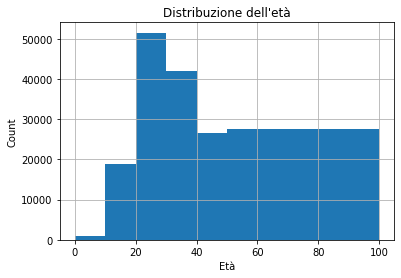

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Distribuzione dell\'età')
plt.xlabel('Età')
plt.ylabel('Count')
plt.savefig('System2.png', bbox_inches='tight')
plt.show()

In [ ]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [ ]:
users.loc[(users.Age < 5) | (users.Age > 90), 'Age'] = np.nan

In [ ]:
users.Age = users.Age.fillna(users.Age.mean())
users.Age = users.Age.astype(np.int32)
users.Age.unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88], dtype=int32)

**Location**

Per fare un po' di chiarezza, divdiamo la colonna Location in 3 colonne:
* City;
* State;
* Country.

e consideriamo, da ora in poi, solo Country.

In [ ]:
users[['City', 'State', 'Country']] = users['Location'].str.split(',', 2, expand=True)
users

,userId,Location,Age,City,State,Country
0,1,"nyc, new york, usa",34,nyc,new york,usa
1,2,"stockton, california, usa",18,stockton,california,usa
2,3,"moscow, yukon territory, russia",34,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",34,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",34,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",34,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",34,knoxville,tennessee,usa


In [ ]:
users.drop(['Location', 'City', 'State'], axis=1, inplace=True)
users

,userId,Age,Country
0,1,34,usa
1,2,18,usa
2,3,34,russia
3,4,17,portugal
4,5,34,united kingdom
...,...,...,...
278853,278854,34,usa
278854,278855,50,united kingdom
278855,278856,34,canada
278856,278857,34,usa


In [ ]:
users.rename(columns = {'Country':'Location'}, inplace = True)
users

,userId,Age,Location
0,1,34,usa
1,2,18,usa
2,3,34,russia
3,4,17,portugal
4,5,34,united kingdom
...,...,...,...
278853,278854,34,usa
278854,278855,50,united kingdom
278855,278856,34,canada
278856,278857,34,usa


# Ratings

Analizzando il dataset dei ratings ci accorgiamo che la matrice user-books ratings avrà dei valori sparsi, in quanto il numero di ratings è inferiore alla dimensione della matrice books x users.

In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
n_users = users.shape[0]
n_books = books.shape[0]

n_users * n_books 

75670906880

In [ ]:
ratings.head()

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**Distribuzione dei ratings**

I ratings hanno una distribuzione tutt'altro che comparabile. Infatti, la maggior parte dei punteggi ha valore 0, che indica assenza di voto.

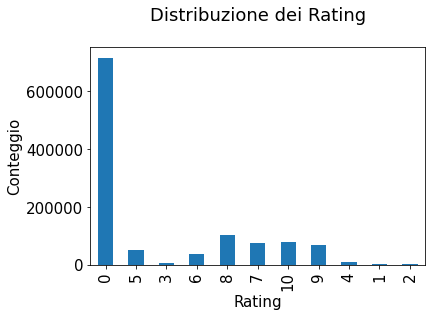

In [ ]:
from pyparsing.helpers import counted_array
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Distribuzione dei Rating\n')
plt.xlabel('Rating')
plt.ylabel('Conteggio')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

Verifichiamo che i ratings siano relativi a dei libri presenti nel dataset books e che siano effettuati da utenti presenti in users.

In [ ]:
new_ratings = ratings[ratings.ISBN.isin(books.ISBN)]
new_ratings = new_ratings[new_ratings.userId.isin(users.userId)]

In [ ]:
new_ratings.shape

(1031136, 3)

In [ ]:
ratings.shape

(1149780, 3)

Diamo una stima precisa della sparsità dei dati:

In [ ]:
sparsity = 1.0-len(new_ratings)/float(n_users*n_books)

print("La sparsità dei dati è pari al " + str(sparsity*100) + " %")

La sparsità dei dati è pari al 99.99863734155898 %


Occorre fare una distinzione, separando le valutazioni **esplicite**, rappresentate dai voti compresi tra 1–10 dalle valutazioni **implicite**, con valori pari a 0. 
Utilizzeremo solo valutazioni esplicite per creare il nostro sistema di book recommendation. 
Allo stesso modo, bisogna separare gli utenti che hanno dato valutazioni esplicite e quelli che hanno dato valutazioni implicite.

In [ ]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
explicit_ratings = new_ratings[new_ratings.bookRating  != 0]
implicit_ratings = new_ratings[new_ratings.bookRating  == 0]

In [ ]:
users_explicit_ratings = users[users.userId.isin(explicit_ratings.userId)]
users_implicit_ratings = users[users.userId.isin(implicit_ratings.userId)]

Visualizziamo graficamente il conteggio di ciascun rating attraverso un countplot

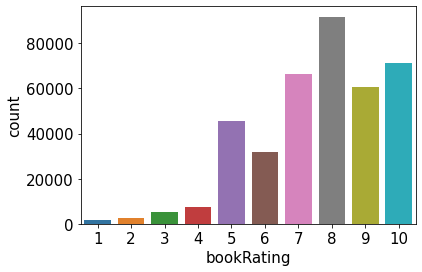

In [ ]:
sns.countplot(data=explicit_ratings, x='bookRating')
plt.show()

# Sistema di recommendation basato sulla popolarità

Si può creare un semplice sistema di recommedation basato sulla popolarità in base al conteggio delle valutazioni degli utenti per i diversi libri. 


In [ ]:
ratings_count = pd.DataFrame(explicit_ratings.groupby(['ISBN'])['bookRating'].sum())
top10 = ratings_count.sort_values('bookRating', ascending=False).head(10)

print("I libri seguenti sono quelli più consigliati:")
top10.merge(books, left_index = True, right_on = 'ISBN')

I libri seguenti sono quelli più consigliati:


,bookRating,ISBN,bookTitle,bookAuthor,yearOfPubblication,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


# Recommendations basate sulla correlazione

Usiamo il coefficiente di correlazione di Pearson per misurare la correlazione tra due variabili, cioè tra i ratings di due libri.
Prima di tutto dobbiamo calcolare la media dei ratings e il numero di ratings che ha ricevuto ogni libro.

In [ ]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending = False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


**Osservazioni**

Da questo dataset risulta evidente che il libro che ha ricevuto più votazioni (1.019.584 per l'esattezza) ha in realtà ricevuto un punteggio totale troppo basso. 
Questo significa che la maggior parte delle votazioni avevano un valore pari a 0, e quindi basare il sistema di recommendation sul conteggio dei ratings non è un metodo efficace.

# Sistema di recommendation basato sul Collaborative Filtering

Per questo tipo di analisi riduciamo le dimensioni del dataset, prendendo in considerazione gli utenti che hanno valutato almeno 100 libri e i libri che hanno almeno 100 valutazioni.

In [ ]:
counts1 = explicit_ratings['userId'].value_counts()
explicit_ratings =  explicit_ratings[explicit_ratings['userId'].isin(counts1[counts1 >= 200].index)]

counts2 = explicit_ratings['bookRating'].value_counts()
explicit_ratings =  explicit_ratings[explicit_ratings['bookRating'].isin(counts2[counts2 >= 100].index)]

Uno step fondamentale in un sistema di reccomendation basato sul collaborative filtering è la creazione di una matrice utente-prodotto a partire dalla tabella ratings.

In [ ]:
ratings_matrix = explicit_ratings.pivot(index='userId', columns='ISBN').bookRating
userId = ratings_matrix.index
ISBN = ratings_matrix.columns

print(ratings_matrix.shape)
ratings_matrix.head()

(118, 44306)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,0001048082,0001053736,0001053744,0001056107,0001845039,...,9997507002,999750805X,9997519086,9997555635,B00001U0CP,B00005TZWI,B00007FYKW,B0000DYXID,B0000T6KHI,B000234N3A
userId,,,,,,,,,,,,,,,,,,,,,
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN


Scopriamo quali libri sono correlati al secondo più votato "The Lovely Bones: A Novel".

In [ ]:
bones_ratings = ratings_matrix['0316666343']
similar_to_bones = ratings_matrix.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
ISBN,,
0140293248,1.0,367
0380789035,1.0,302
0316666343,1.0,1295
044651652X,1.0,368
0440225701,1.0,379
0440222656,1.0,420
0385720106,1.0,320
0684872153,1.0,326
0385265700,1.0,319


Otteniamo i titoli dei libri a partire dagli ISBN del precedente risultato, in modo da avere una tabella leggibile.

In [ ]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')
corr_books

,ISBN,bookTitle,bookAuthor,yearOfPubblication,publisher
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner


# Collaborative Filtering basato sugli utenti

La funzione findKSimilarUsers prende in input l'Id utente e la matrice di valutazione e restituisce similarità e indici di K utenti simili. (Leggi le mie storie precedenti per comprendere il concetto e le formule degli approcci CF basati sull'utente/elemento)

In [ ]:
import sklearn as skl
import sklearn.neighbors as nbs

In [ ]:
def findKSimilarUsers(user_id, ratings, metric = metric, k = k):
  similarities = []
  indices = []
  model = nbs.NearestNeighbors(metric = metric, algorithm = 'brute')
  model.fit(ratings.to_numpy())
  loc = ratings.index.get_loc(user_id)
  distances, indices = model.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
  similarities = 1-distances.flatten()
  print ('I {0} utenti più simili all\'utente {1} sono:\n'.format(k,user_id))
  for i in range(0, len(indices.flatten())):
      if indices.flatten()[i]+1 == user_id:
          continue;
      else:
          print('{0}: Utente {1}, con una similarità di {2}'.format(i, indices.flatten()[i]+1, similarities.flatten()[i]))
          
  return similarities,indices

In [ ]:
ratings_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
ratings_matrix.fillna(0, inplace=True)

**Similarità coseno**

In [ ]:
findKSimilarUsers(7346, ratings_matrix, metric='cosine')

I 4 utenti più simili all'utente 7346 sono:

0: Utente 4, con una similarità di 1.0
1: Utente 48, con una similarità di 0.057075683795396404
2: Utente 3, con una similarità di 0.05440117676891487
3: Utente 53, con una similarità di 0.04860022498555239
4: Utente 5, con una similarità di 0.0470229181888826


(array([1.        , 0.05707568, 0.05440118, 0.04860022, 0.04702292]),
 array([[ 3, 47,  2, 52,  4]]))

**Similarità di Pearson**

In [ ]:
findKSimilarUsers(7346, ratings_matrix, metric='correlation')

I 4 utenti più simili all'utente 7346 sono:

0: Utente 4, con una similarità di 0.9999999999999998
1: Utente 3, con una similarità di 0.048826221774663336
2: Utente 48, con una similarità di 0.048063409889268494
3: Utente 114, con una similarità di 0.04138559104886752
4: Utente 53, con una similarità di 0.04133588039815361


(array([1.        , 0.04882622, 0.04806341, 0.04138559, 0.04133588]),
 array([[  3,   2,  47, 113,  52]]))

La funzione predict_userbased predice il punteggio di uno specifico utente per un particolare prodotto, seguendo un approcccio basato sull'utente.

 

In [ ]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findKSimilarUsers(user_id, ratings, metric, k) # utenti simili in base alla similarità coseno
    mean_rating = ratings.iloc[user_loc,:].mean() 
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_id:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print("Il punteggio predetto per l'utente {0} -> item {1}: {2}".format(user_id, item_id, prediction))
    return prediction

In [ ]:
predict_userbased(7346, '0001056107', ratings_matrix)

I 4 utenti più simili all'utente 7346 sono:

0: Utente 4, con una similarità di 1.0
1: Utente 48, con una similarità di 0.057075683795396404
2: Utente 3, con una similarità di 0.05440117676891487
3: Utente 53, con una similarità di 0.04860022498555239
4: Utente 5, con una similarità di 0.0470229181888826
Il punteggio predetto per l'utente 7346 -> item 0001056107: 2


2

La funzione recommendItem utilizza le funzioni precedenti per consigliare libri. Le recommendation vengono fornite se la valutazione prevista per un libro è maggiore o uguale a 6 e se i libri non sono già stati valutati. 

In [ ]:
import re
import ipywidgets as widgets
import IPython.display as ipd

In [ ]:
import contextlib
import sys

@contextlib.contextmanager
def suppress_stdout(suppress=True):
    std_ref = sys.stdout
    if suppress:
        sys.stdout = open('/dev/null', 'w')
        yield
    sys.stdout = std_ref

In [ ]:
def recommendItem(user_id, ratings, metric = metric):
    if (user_id not in ratings.index.values) or type(user_id) is not int:
      print("userId deve essere un integer valido tra questi: {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix))))
    else :
      ids = ['Correlazione item-based', 'Similarità coseno item-based', 'Correlazione user-based', 'Similarità coseno user-based']
      select = widgets.Dropdown(options=ids, value=ids[0], description='Seleziona approccio', width='1000px')
      def on_change(change):
        ipd.clear_output(wait = True)
        prediction = []
        if change['type'] == 'change' and change['name'] == 'value':
          if (select.value == 'Correlazione item-based') | (select.value == 'Correlazione user-based') :
            metric = 'correlation'
          else :
            metric = 'cosine'
          with suppress_stdout():
            if (select.value == 'Correlazione item-based') | (select.value == 'Similarità coseno item-based'):
              for i in range(ratings.shape[1]):
                if(ratings[str(ratings.columns[i])][user_id] != 0): # non è stato ancora recensito
                 prediction.append(predict_itembased(user_id, str(ratings.columns[i]), ratings, metric))
                 print('da fare')
                else :
                  prediction.append(-1)
            else :
              for i in range(ratings.shape[1]):
                if(ratings[str(ratings.columns[i])][user_id] != 0): # non è stato ancora recensito
                 prediction.append(predict_userbased(user_id, str(ratings.columns[i]), ratings, metric))
                else :
                  prediction.append(-1)
          prediction = pd.Series(prediction)
          prediction = prediction.sort_values(ascending=False)
          recommended = prediction[:10]
          print("secondo l'approccio {0}, i seguenti libri sono consigliati...".format(select.value))
          for i in range(len(recommended)):
            print("{0}. {1}".format(i+1, books.bookTitle[recommended.index[i]]))
      select.observe(on_change)
      display(select)

In [ ]:
recommendItem(7346, ratings_matrix)

Dropdown(description='Seleziona approccio', options=('Correlazione item-based', 'Similarità coseno item-based'…

# Collaborative Filtering basato sui prodotti

Andiamo ora ad implementare funzioni simili per un CF non più basato sugli utenti, ma sui prodotti. Il metodo findKSimilarItems individua k libri simili e prevede le valutazioni degli utenti per ognuno di essi. La funzione predict_itemBased, invece, può essere utilizzata per consigliare libri sempre secondo un approccio basato sui prodotti.
Le recommendation vengono fornite se la valutazione prevista per un libro è maggiore o uguale a 6 e i libri non sono già stati valutati.

In [ ]:
def findKSimilarItems(item_id, ratings, metric = metric, k = k):
  similarities = []
  indices = []
  ratings = ratings.T
  loc = ratings.index.get_loc(item_id)
  model = nbs.NearestNeighbors(metric = metric, algorithm = 'brute')
  model.fit(ratings.to_numpy())
  distances, indices = model.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
  similarities = 1-distances.flatten()
  print ('I {0} libri più simili al libro {1} sono:\n'.format(k, item_id))
  for i in range(1, len(indices.flatten())):
      if indices.flatten()[i]+1 == item_id:
          continue;
      else:
          print('{0}: Libro {1}, con una similarità di {2}'.format(i, indices.flatten()[i]+1, similarities.flatten()[i]))
          
  return similarities,indices

In [ ]:
findKSimilarItems('000104687X', ratings_matrix, 'correlation')

I 4 libri più simili al libro 000104687X sono:

1: Libro 28099, con una similarità di 1.0
2: Libro 399, con una similarità di 1.0
3: Libro 36317, con una similarità di 1.0
4: Libro 16602, con una similarità di 1.0


(array([1., 1., 1., 1., 1.]), array([[ 2640, 28098,   398, 36316, 16601]]))

In [ ]:
findKSimilarItems('000104687X', ratings_matrix, 'cosine')

I 4 libri più simili al libro 000104687X sono:

1: Libro 7067, con una similarità di 1.0
2: Libro 13760, con una similarità di 1.0
3: Libro 13749, con una similarità di 1.0
4: Libro 13763, con una similarità di 1.0


(array([1., 1., 1., 1., 1.]), array([[ 4011,  7066, 13759, 13748, 13762]]))

In [ ]:
def predict_itembased(user_id, item_id, ratings, metric = metric, k = k):
  prediction = wtd_sum = 0
  user_loc = ratings.index.get_loc(user_id)
  item_loc = ratings.columns.get_loc(item_id)
  similarities, indices = findKSimilarItems(item_id, ratings)
  sum_wt = np.sum(similarities)-1
  product = 1
  for i in range(0, len(indices.flatten())):
    if indices.flatten()[i] == item_loc:
      continue;
    else :
      product = ratings.iloc[user_loc, indices.flatten()[i]]*(similarities[i])
  prediction = int(round(wtd_sum/sum_wt))
  if prediction <= 0:
    prediction = 1
  elif prediction > 10 :
    preditcion = 10
  print('Il punteggio predetto per l\'utente {0} -> item {1}: {2}'.format(user_id, item_id, prediction))
  return prediction

In [ ]:
prediction = predict_itembased(11676, '0001056107', ratings_matrix)

I 4 libri più simili al libro 0001056107 sono:

1: Libro 13650, con una similarità di 0.9982743731749958
2: Libro 41672, con una similarità di 0.9922778767136676
3: Libro 1408, con una similarità di 0.9899494936611665
4: Libro 33008, con una similarità di 0.8781140799175227
Il punteggio predetto per l'utente 11676 -> item 0001056107: 1


In [ ]:
prediction = predict_itembased(274061, '000104687X', ratings_matrix)

I 4 libri più simili al libro 000104687X sono:

1: Libro 7067, con una similarità di 1.0
2: Libro 13760, con una similarità di 1.0
3: Libro 13749, con una similarità di 1.0
4: Libro 13763, con una similarità di 1.0
Il punteggio predetto per l'utente 274061 -> item 000104687X: 1


In [ ]:
recommendItem(4385, ratings_matrix)

secondo l'approccio Correlazione user-based, i seguenti libri sono consigliati...
1. Seduced
2. First and Last Seasons: A Father, a Son, and Sunday Afternoon Football
3. How to Raise a Family &amp; Career Under One Roof:A Parent's Guide to Home Business
4. A Certain Smile
5. El Pendulo de Foucault
6. Memoirs of a Beatnik
7. Men at Arms
8. The Marilyn Tapes: A Novel
9. Over the Water
10. Judaism: A Very Short Introduction (Very Short Introductions)


In [ ]:
recommendItem(4385, ratings_matrix)

secondo l'approccio Similarità coseno user-based, i seguenti libri sono consigliati...
1. Seduced
2. First and Last Seasons: A Father, a Son, and Sunday Afternoon Football
3. How to Raise a Family &amp; Career Under One Roof:A Parent's Guide to Home Business
4. Operation Rainbow.
5. A Certain Smile
6. El Pendulo de Foucault
7. Memoirs of a Beatnik
8. Men at Arms
9. The Marilyn Tapes: A Novel
10. Judaism: A Very Short Introduction (Very Short Introductions)


In [ ]:
recommendItem(4385, ratings_matrix)

secondo l'approccio Similarità coseno item-based, i seguenti libri sono consigliati...
1. How to Raise a Family &amp; Career Under One Roof:A Parent's Guide to Home Business
2. A Ride into Morning: The Story of Tempe Wick
3. The Tale of Murasaki: A Novel
4. Fairy Tales : Traditional Stories Retold for Gay Men
5. When Mothers Pray
6. Odd Woman
7. Women Make the Best Salesmen : IsnÂ?t it Time You Started Using their Secrets?
8. We Are Gathered Here
9. War Between the Tates
10. Ice Stars (All Aboard Reading. Level 3)


In [ ]:
recommendItem(4385, ratings_matrix)

Dropdown(description='Seleziona approccio', options=('Correlazione item-based', 'Similarità coseno item-based'…

In [ ]:
recommendItem(274061, ratings_matrix)